In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt

In [2]:
img = cv2.imread("/media/amardeep/New Volume/Data Analysis/Project2/model/test_images/sharapova1.jpg")
img.shape

(555, 700, 3)

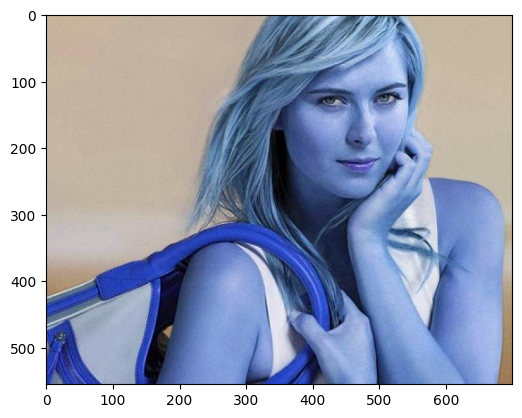

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

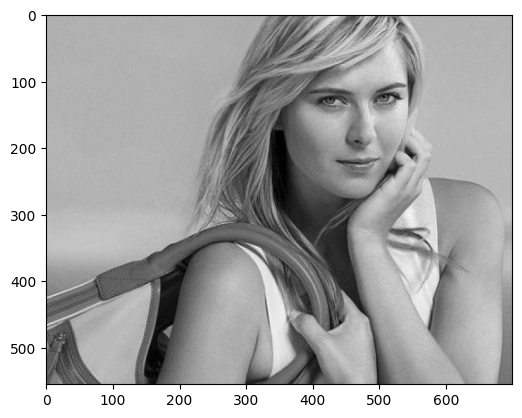

In [5]:
gray
plt.imshow(gray,cmap="gray")

In [6]:
face_cascade = cv2.CascadeClassifier("/media/amardeep/New Volume/Data Analysis/Project2/model/Opnecv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/media/amardeep/New Volume/Data Analysis/Project2/model/Opnecv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)           #1.3 is the scale factor, 5 = minNeighbors
faces

array([[352,  38, 233, 233]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

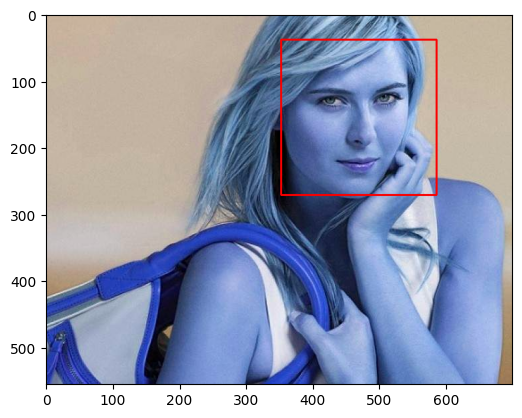

In [8]:
rect = cv2.rectangle(img,(x,y),(x+w,y+h),(250,0,0),2)    # (250,0,0)--> Color code, 2--> Boxwidth
plt.imshow(rect)

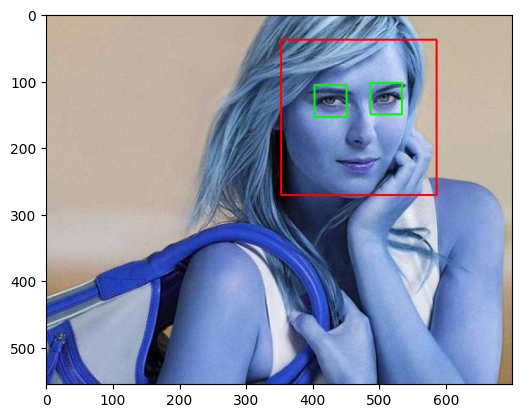

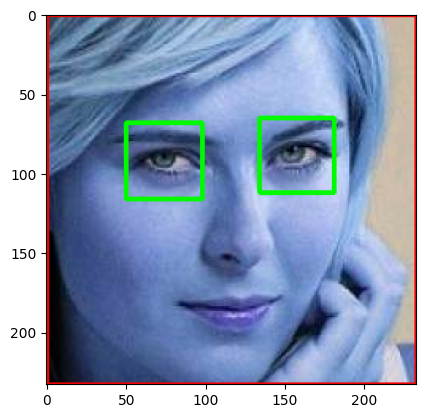

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(250,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]                 #gray croped image
    roi_color = face_img[y:y+h,x:x+w]            #Cropped image
    eye = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh)  in eye:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,250,0),2)
plt.imshow(face_img,cmap='gray')
plt.show()
plt.imshow(roi_color,cmap='gray')
plt.show()

In [10]:
crop_img = np.array(roi_color)
crop_img.shape

(233, 233, 3)

In [16]:
def w2d(img,mode='haar',level=1):
    img_arr = img
    img_arr = cv2.cvtColor(img_arr,cv2.COLOR_RGB2GRAY)  #Gray Image
    img_arr = np.float32(img_arr)
    img_arr /= 255                   
    coeff = pywt.wavedec2(img_arr,mode,level)          

    coeff_H = list(coeff)
    coeff_H[0] *= 0

    img_H = pywt.waverec2(coeff_H,mode)
    img_H *= 255
    img_H = np.uint8(img_H)

    return img_H



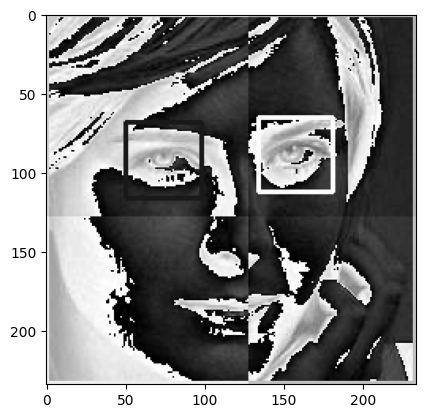

In [18]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har,cmap='gray')

#### A wavelet transformed image can be seen in above ,that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier \\
**Now It's time to write a function which takes input a image and gives cropped imageas a output**

In [21]:
def get_croped_img_2_eyes(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)         #It simplifies the image data, making the detection process more efficient.
    faces = face_cascade.detectMultiScale(img_gray,1.3,5)   
    for (x,y,w,h) in faces:
        roi_gray = img_gray[y:y+h,x:x+w]
        roi_img = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(img_gray)
        if len(eyes) >= 2:
            return  roi_img

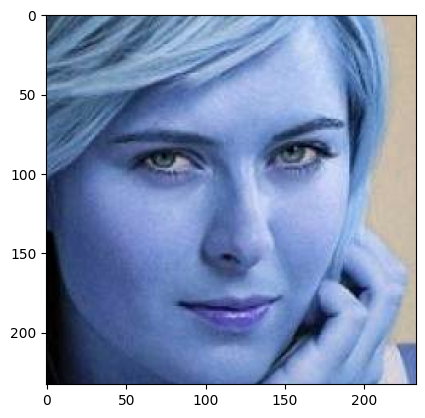

In [22]:
croped_img = get_croped_img_2_eyes('/media/amardeep/New Volume/Data Analysis/Project2/model/test_images/sharapova1.jpg')
plt.imshow(croped_img)

In [31]:
path_to_data = "/media/amardeep/New Volume/Data Analysis/Project2/images_dataset"
path_to_cr_data = "/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/cropped"

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):      #It scans the directory and if any subdirectory found it appends it's path in the img_dirs
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/cropped',
 '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/lionel_messi',
 '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/maria_sharapova',
 '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/roger_federer',
 '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/serena_williams',
 '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/virat_kohli']

In [32]:
import shutil                                        #used for delete remove file or directory
if os.path.exists(path_to_cr_data):                  
     shutil.rmtree(path_to_cr_data)                  #deletes the entire directory 
os.mkdir(path_to_cr_data)

**This will creat a folder and then store the cropped images**

In [33]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_croped_img_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi
Generating cropped images in folder:  /media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedmaria_sharapova
Generating cropped images in folder:  /media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedroger_federer
Generating cropped images in folder:  /media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedserena_williams
Generating cropped images in folder:  /media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedvirat_kohli


In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedlionel_messi': ['/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi24.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi1.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi10.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi11.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi12.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi13.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi14.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi15.png',
  '/media/amardeep/New Volume/Data Analysis/Project2/images_dataset/croppedlionel_messi/lionel_messi17.png

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedlionel_messi': 0,
 'croppedmaria_sharapova': 1,
 'croppedroger_federer': 2,
 'croppedserena_williams': 3,
 'croppedvirat_kohli': 4}